<a href="https://colab.research.google.com/github/parme31etkaur/Blogs/blob/main/Human_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary Libraries**

In [ ]:
#Importing neccesary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'UCI HAR Dataset')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
# features=list()
# with open("sample_data/Dataset/features.txt") as f:
#     for line in f:
#       features.append(line.split()[1])
      

In [ ]:
path=os.path.join(DATADIR, 'features.txt')

In [ ]:
features=list()
with open(os.path.join(DATADIR, 'features.txt')) as f:
    for line in f:
      features.append(line.split()[1])

In [ ]:
train_df=pd.read_csv(os.path.join(DATADIR, 'train/X_train.txt'),delim_whitespace=True)

train_df.columns=features

train_df["subject_id"]=pd.read_csv((os.path.join(DATADIR, 'train/subject_train.txt')),header=None,squeeze=True)

train_df["activity"]=pd.read_csv((os.path.join(DATADIR, 'train/y_train.txt')),header=None,squeeze=True)

activity=pd.read_csv((os.path.join(DATADIR, 'train/y_train.txt')),header=None,squeeze=True)

label_name=activity.map({1:"Walking",2:"Walking_Upstairs",3:"Walking_Downstairs",4:"Sitting",5:"Standing",6:"Lying"})

train_df["activity_name"]=label_name

train_df.head()


<ipython-input-54-5964abbde03f>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train_df["subject_id"]=pd.read_csv((os.path.join(DATADIR, 'train/subject_train.txt')),header=None,squeeze=True)
<ipython-input-54-5964abbde03f>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train_df["activity"]=pd.read_csv((os.path.join(DATADIR, 'train/y_train.txt')),header=None,squeeze=True)
<ipython-input-54-5964abbde03f>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  activity=pd.read_csv((os.path.join(DATADIR, 'train/y_train.txt')),header=None,squeeze=True)


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278419          -0.016411          -0.123520         -0.998245   
1           0.279653          -0.019467          -0.113462         -0.995380   
2           0.279174          -0.026201          -0.123283         -0.996091   
3           0.276629          -0.016570          -0.115362         -0.998139   
4           0.277199          -0.010098          -0.105137         -0.997335   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.975300         -0.960322         -0.998807         -0.974914   
1         -0.967187         -0.978944         -0.996520         -0.963668   
2         -0.983403         -0.990675         -0.997099         -0.982750   
3         -0.980817         -0.990482         -0.998321         -0.979672   
4         -0.990487         -0.995420         -0.997627         -0.990218   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.957686         -0.943068  ...                     0.053477   
1         -0.977469         -0.938692  ...                    -0.118559   
2         -0.989302         -0.938692  ...                    -0.036788   
3         -0.990441         -0.942469  ...                     0.123320   
4         -0.995549         -0.942469  ...                     0.082632   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                             -0.007435                         -0.732626   
1                              0.177899                          0.100699   
2                             -0.012892                          0.640011   
3                              0.122542                          0.693578   
4                             -0.143439                          0.275041   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.703511             -0.844788   
1                              0.808529             -0.848933   
2                             -0.485366             -0.848649   
3                             -0.615971             -0.847865   
4                             -0.368224             -0.849632   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject_id  activity  \
0              0.180289             -0.054317           1         5   
1              0.180637             -0.049118           1         5   
2              0.181935             -0.047663           1         5   
3              0.185151             -0.043892           1         5   
4              0.184823             -0.042126           1         5   

   activity_name  
0       Standing  
1       Standing  
2       Standing  
3       Standing  
4       Standing  

[5 rows x 564 columns]

# New Section

In [ ]:
print("Size of training data={}".format(train_df.shape))

Size of training data=(7351, 564)


In [ ]:
test_df=pd.read_csv((os.path.join(DATADIR, 'test/X_test.txt')),delim_whitespace = True)

test_df.columns=features

test_df["subject_id"]=pd.read_csv(os.path.join(DATADIR, 'test/subject_test.txt'),header=None,squeeze=True)

test_df["activity"]=pd.read_csv(os.path.join(DATADIR, 'test/y_test.txt'),header=None,squeeze=True)

activity=pd.read_csv(os.path.join(DATADIR, 'test/y_test.txt'),header=None,squeeze=True)

label_name=activity.map({1:"Walking",2:"Walking_Upstairs",3:"Walking_Downstairs",4:"Sitting",5:"Standing",6:"Lying"})

test_df["activity_name"]=label_name

test_df.head()

<ipython-input-57-d1d8e1063cb8>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df["subject_id"]=pd.read_csv(os.path.join(DATADIR, 'test/subject_test.txt'),header=None,squeeze=True)
<ipython-input-57-d1d8e1063cb8>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df["activity"]=pd.read_csv(os.path.join(DATADIR, 'test/y_test.txt'),header=None,squeeze=True)
<ipython-input-57-d1d8e1063cb8>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  activity=pd.read_csv(os.path.join(DATADIR, 'test/y_test.txt'),header=None,squeeze=True)


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.286027          -0.013163          -0.119083         -0.975415   
1           0.275485          -0.026050          -0.118152         -0.993819   
2           0.270298          -0.032614          -0.117520         -0.994743   
3           0.274833          -0.027848          -0.129527         -0.993852   
4           0.279220          -0.018620          -0.113902         -0.994455   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.967458         -0.944958         -0.986799         -0.968401   
1         -0.969926         -0.962748         -0.994403         -0.970735   
2         -0.973268         -0.967091         -0.995274         -0.974471   
3         -0.967445         -0.978295         -0.994111         -0.965953   
4         -0.970417         -0.965316         -0.994585         -0.969481   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.945823         -0.894088  ...                    -0.083495   
1         -0.963483         -0.939260  ...                    -0.034956   
2         -0.968897         -0.938610  ...                    -0.017067   
3         -0.977346         -0.938610  ...                    -0.002223   
4         -0.965897         -0.937856  ...                    -0.095681   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.017500                         -0.434375   
1                              0.202302                          0.064103   
2                              0.154438                          0.340134   
3                             -0.040046                          0.736715   
4                              0.048849                          0.760684   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.920593             -0.698091   
1                              0.145068             -0.702771   
2                              0.296407             -0.698954   
3                             -0.118545             -0.692245   
4                             -0.072216             -0.689816   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject_id  activity  \
0              0.281343             -0.083898           2         5   
1              0.280083             -0.079346           2         5   
2              0.284114             -0.077108           2         5   
3              0.290722             -0.073857           2         5   
4              0.294896             -0.068471           2         5   

   activity_name  
0       Standing  
1       Standing  
2       Standing  
3       Standing  
4       Standing  

[5 rows x 564 columns]

In [ ]:
print("Sizing of testing data={}".format(test_df.shape))
print("Sizing of training data={}".format(train_df.shape))


Sizing of testing data=(2946, 564)
Sizing of training data=(7351, 564)


In [ ]:
print("Number of NaN values in the trainset is ",str(train_df.isnull().sum().sum()))

Number of NaN values in the trainset is  0


In [ ]:
print("Number of NaN values in the test set is ",str(test_df.isnull().sum().sum()))

Number of NaN values in the test set is  0


In [ ]:
print("Number of duplicate values in trainSet is ",str(sum(train_df.duplicated())))
print("Number of duplicate values in testSet is ",str(sum(test_df.duplicated())))

Number of duplicate values in trainSet is  0
Number of duplicate values in testSet is  0


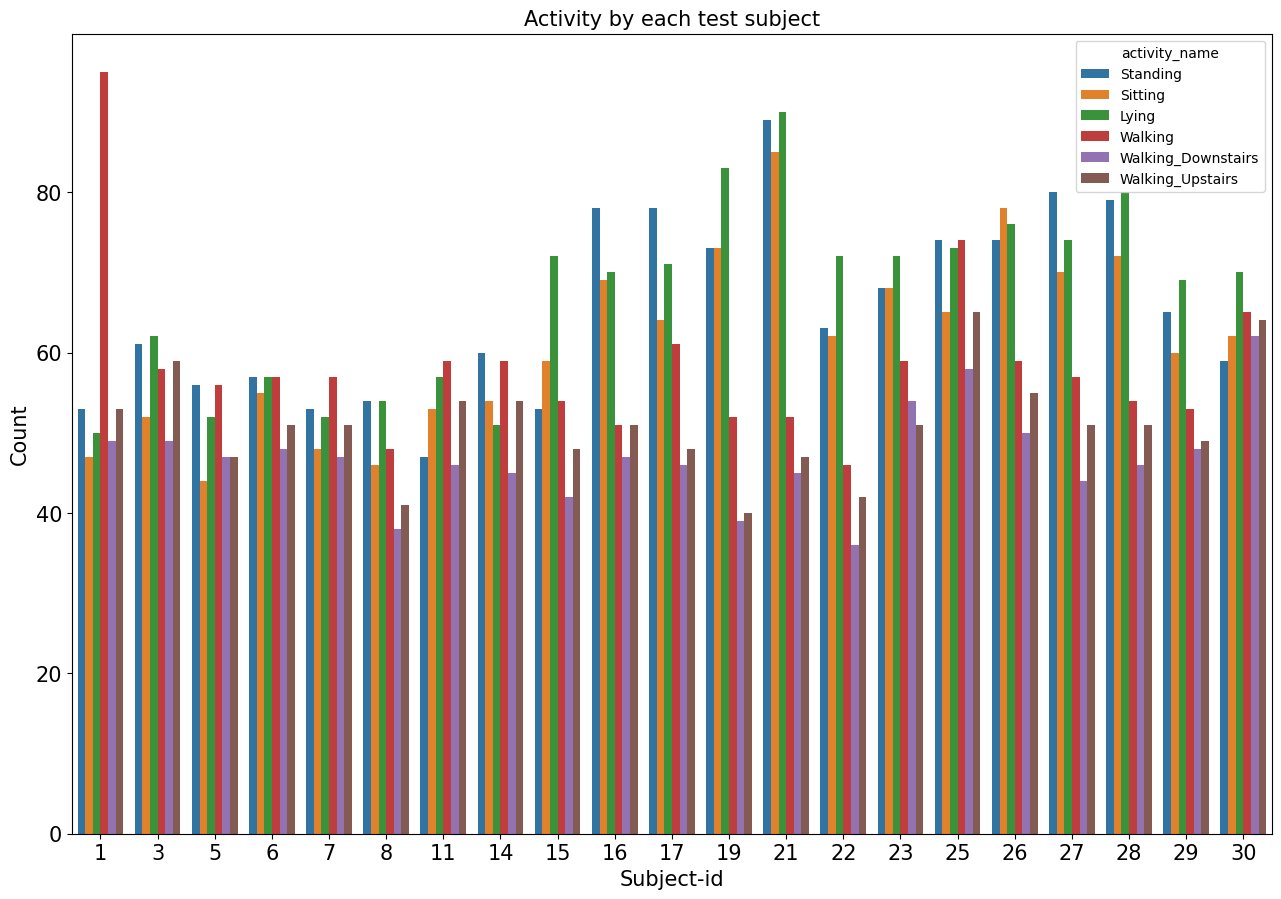

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject",fontsize=15)
plt.tick_params(labelsize=15)
sns.countplot(x="subject_id",hue="activity_name",data=train_df)
plt.xlabel("Subject-id",fontsize=15)
plt.ylabel("Count",fontsize=15)


plt.show()

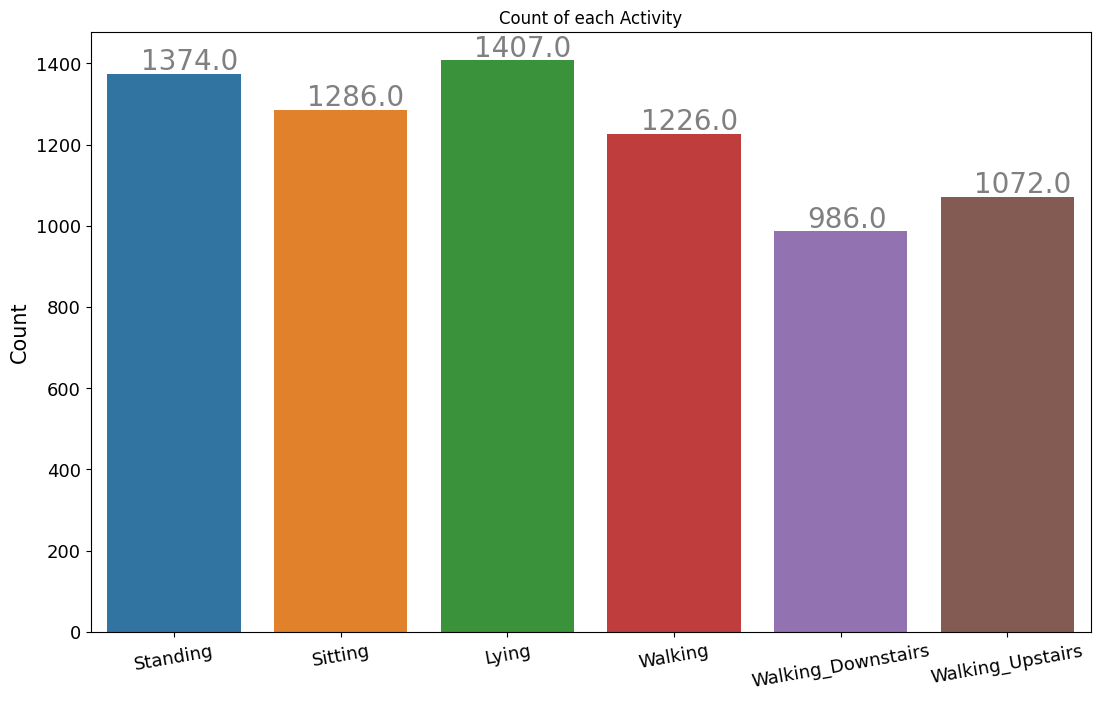

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_title("Count of each Activity")
plt.tick_params(labelsize=10)
sns.countplot(x="activity_name",data=train_df)
for i in ax.patches:
  ax.text(x=i.get_x()+0.2,y=i.get_height()+10,s=str(i.get_height()),fontsize=20,color="grey")
plt.xlabel("")
plt.ylabel("Count",fontsize=15)
plt.tick_params(labelsize=13)
plt.xticks(rotation=10)
plt.show()


In [ ]:
columns=train_df.columns

In [ ]:
columns=columns.str.replace("[()]",'')
columns=columns.str.replace("-",'')
columns=columns.str.replace(",",'')

train_df.columns=columns
test_df.columns=columns

<ipython-input-66-1ba27328685e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  columns=columns.str.replace("[()]",'')


In [ ]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity', 'activity_name'],
      dtype='object', length=564)

In [ ]:
train_df.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1       0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2       0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3       0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4       0.277199      -0.010098      -0.105137     -0.997335     -0.990487   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.960322     -0.998807     -0.974914     -0.957686     -0.943068  ...   
1     -0.978944     -0.996520     -0.963668     -0.977469     -0.938692  ...   
2     -0.990675     -0.997099     -0.982750     -0.989302     -0.938692  ...   
3     -0.990482     -0.998321     -0.979672     -0.990441     -0.942469  ...   
4     -0.995420     -0.997627     -0.990218     -0.995549     -0.942469  ...   

   angletBodyAccMeangravity  angletBodyAccJerkMeangravityMean  \
0                  0.053477                         -0.007435   
1                 -0.118559                          0.177899   
2                 -0.036788                         -0.012892   
3                  0.123320                          0.122542   
4                  0.082632                         -0.143439   

   angletBodyGyroMeangravityMean  angletBodyGyroJerkMeangravityMean  \
0                      -0.732626                           0.703511   
1                       0.100699                           0.808529   
2                       0.640011                          -0.485366   
3                       0.693578                          -0.615971   
4                       0.275041                          -0.368224   

   angleXgravityMean  angleYgravityMean  angleZgravityMean  subject_id  \
0          -0.844788           0.180289          -0.054317           1   
1          -0.848933           0.180637          -0.049118           1   
2          -0.848649           0.181935          -0.047663           1   
3          -0.847865           0.185151          -0.043892           1   
4          -0.849632           0.184823          -0.042126           1   

   activity  activity_name  
0         5       Standing  
1         5       Standing  
2         5       Standing  
3         5       Standing  
4         5       Standing  

[5 rows x 564 columns]

In [ ]:
test_df.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.286027      -0.013163      -0.119083     -0.975415     -0.967458   
1       0.275485      -0.026050      -0.118152     -0.993819     -0.969926   
2       0.270298      -0.032614      -0.117520     -0.994743     -0.973268   
3       0.274833      -0.027848      -0.129527     -0.993852     -0.967445   
4       0.279220      -0.018620      -0.113902     -0.994455     -0.970417   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.944958     -0.986799     -0.968401     -0.945823     -0.894088  ...   
1     -0.962748     -0.994403     -0.970735     -0.963483     -0.939260  ...   
2     -0.967091     -0.995274     -0.974471     -0.968897     -0.938610  ...   
3     -0.978295     -0.994111     -0.965953     -0.977346     -0.938610  ...   
4     -0.965316     -0.994585     -0.969481     -0.965897     -0.937856  ...   

   angletBodyAccMeangravity  angletBodyAccJerkMeangravityMean  \
0                 -0.083495                          0.017500   
1                 -0.034956                          0.202302   
2                 -0.017067                          0.154438   
3                 -0.002223                         -0.040046   
4                 -0.095681                          0.048849   

   angletBodyGyroMeangravityMean  angletBodyGyroJerkMeangravityMean  \
0                      -0.434375                           0.920593   
1                       0.064103                           0.145068   
2                       0.340134                           0.296407   
3                       0.736715                          -0.118545   
4                       0.760684                          -0.072216   

   angleXgravityMean  angleYgravityMean  angleZgravityMean  subject_id  \
0          -0.698091           0.281343          -0.083898           2   
1          -0.702771           0.280083          -0.079346           2   
2          -0.698954           0.284114          -0.077108           2   
3          -0.692245           0.290722          -0.073857           2   
4          -0.689816           0.294896          -0.068471           2   

   activity  activity_name  
0         5       Standing  
1         5       Standing  
2         5       Standing  
3         5       Standing  
4         5       Standing  

[5 rows x 564 columns]

In [ ]:
train_df.to_csv(os.path.join(DATADIR, 'train/train_df.csv'),index=False)
test_df.to_csv(os.path.join(DATADIR, 'test/test_df.csv'),index=False)

In [ ]:
train_df=pd.read_csv(os.path.join(DATADIR, 'train/train_df.csv'))
test_df = pd.read_csv(os.path.join(DATADIR, 'test/test_df.csv'))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

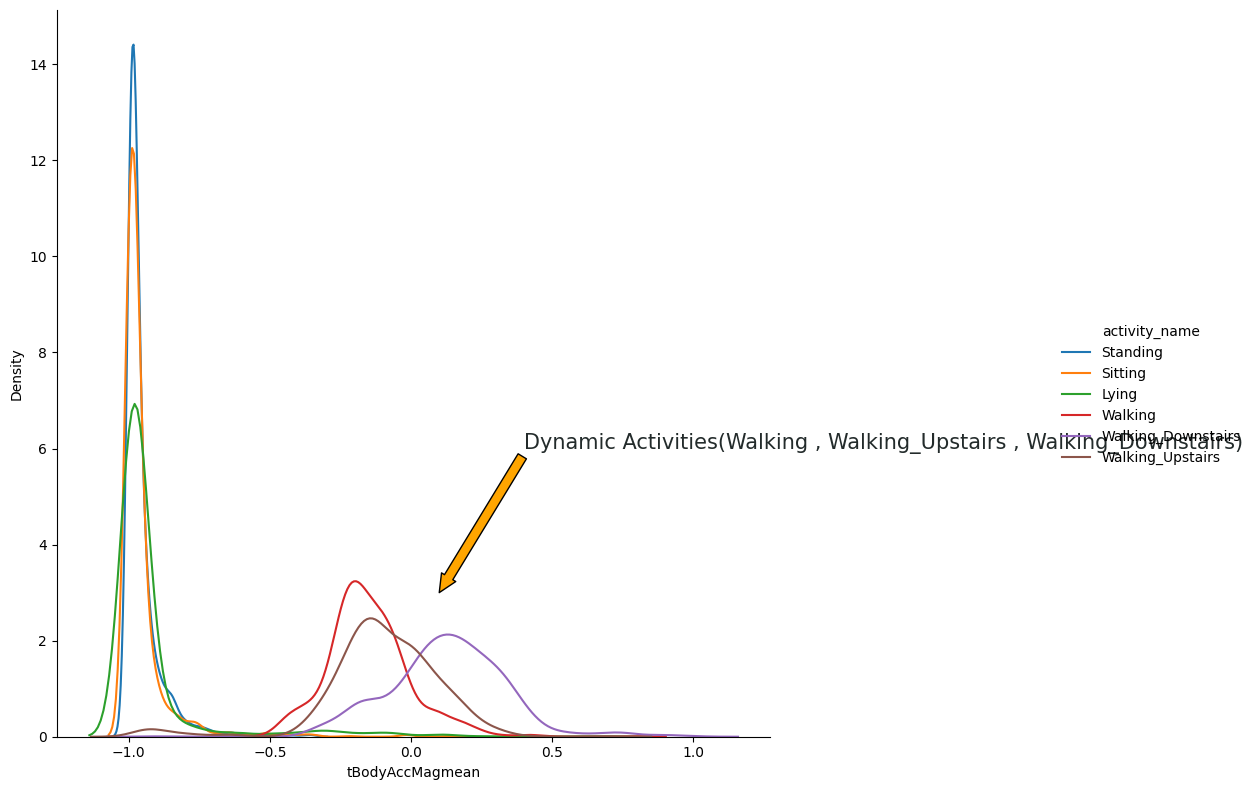

In [ ]:
facetgrid = sns.FacetGrid(data = train_df , hue = "activity_name",height=8)
facetgrid.map(sns.distplot , "tBodyAccMagmean",hist=False).add_legend()
plt.annotate('Static Activities(Sitting , Standing , Lying)',xy=(-0.97,23),xytext =(-0.7 , 27),arrowprops=dict(facecolor ='orange',width=7,headlength = 15),size=15,color="#232b2b")
plt.annotate('Dynamic Activities(Walking , Walking_Upstairs , Walking_Downstairs)',xy=(0.1,3),xytext =(0.4 , 6),arrowprops=dict(facecolor ='orange',width=7,headlength = 13),size=15,color="#232b2b")
plt.show()

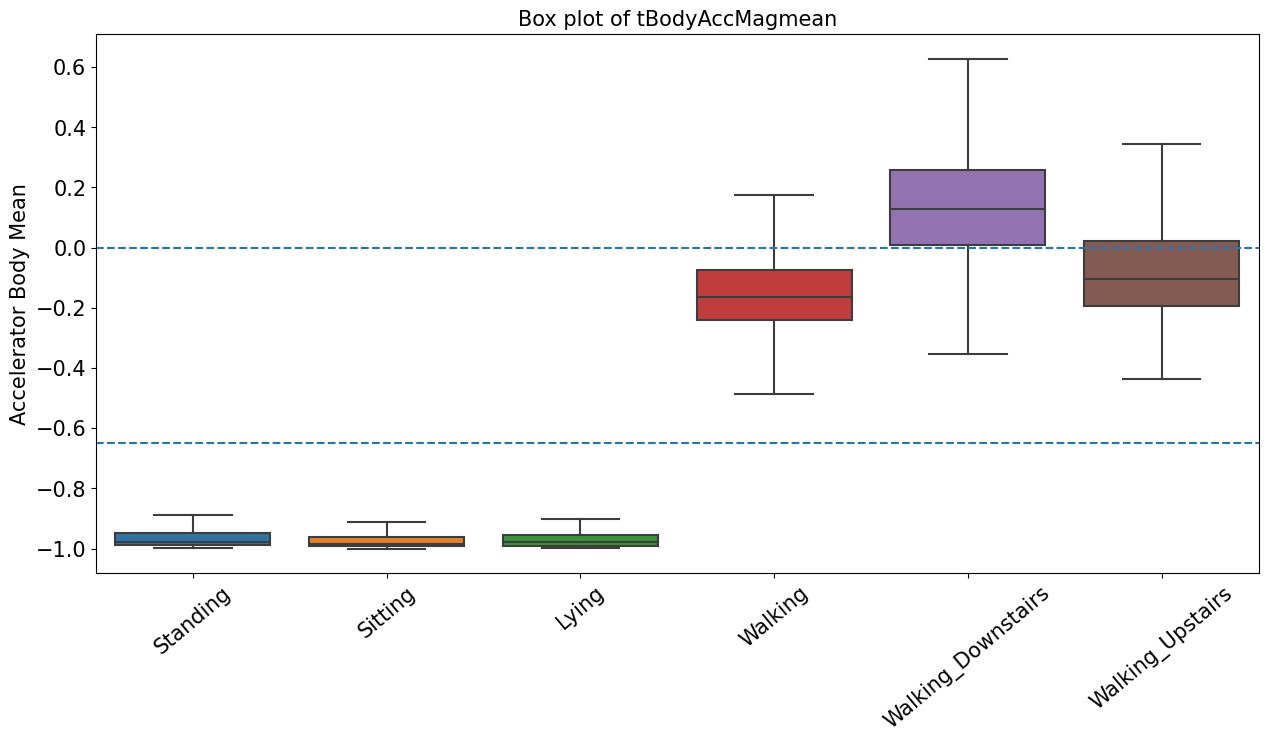

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="activity_name" , y="tBodyAccMagmean" , showfliers = False , data = train_df)
plt.axhline(y=-0.65,linestyle="--")
plt.axhline(y=0,linestyle="--")
plt.title("Box plot of tBodyAccMagmean" , fontsize=15)
plt.ylabel("Accelerator Body Mean",fontsize=15)
plt.xlabel("Activity Name", fontsize=15)
plt.xlabel("")
plt.tick_params(labelsize=15)
plt.xticks(rotation=40)
plt.show()

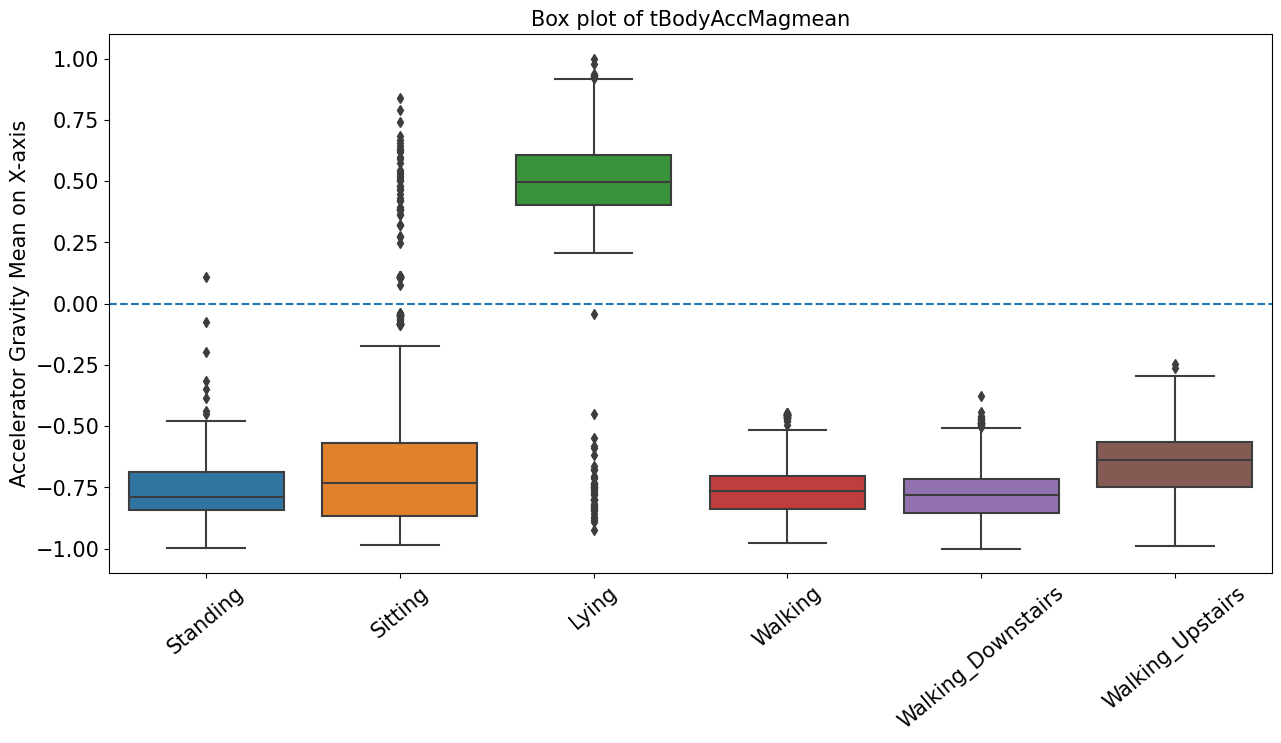

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="activity_name" , y="angleXgravityMean" , showfliers = True , data = train_df)
plt.axhline(y=0,linestyle="--")
plt.title("Box plot of tBodyAccMagmean" , fontsize=15)
plt.ylabel("Accelerator Gravity Mean on X-axis",fontsize=15)
plt.xlabel("")
plt.tick_params(labelsize=15)
plt.xticks(rotation=40)
plt.show()

In [ ]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1) 
    data_label = train_df["activity_name"]
    applying_tsne = TSNE(n_components = 2, perplexity = perplexity, n_iter = 1000, verbose = 2) 
    reduced_dim = applying_tsne.fit_transform(data)
    d = {'x': applying_tsne.embedding_[:,0], 'y': applying_tsne.embedding_[:,1], "activities":data_label}
    df = pd.DataFrame (data = d)
    print("Done...")
    print("Plotting TSNE Visualization...")
    sns.set_style("whitegrid")
    sns.lmplot("x", "y",df, hue='activities', markers=['|', 'o','_', ">", "<", "^"], fit_reg = False, height =10,data=data)
    plt.title("TSNE Plot for Perplexity "+str(perplexity))
    plt.show()

In [197]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["subject_id", "activity", "activity_name"], axis=1)
    data_label = train_df["activity_name"]
    applying_tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, verbose=2)
    reduced_dim = applying_tsne.fit_transform(data)
    d = {'x': applying_tsne.embedding_[:, 0], 'y': applying_tsne.embedding_[:, 1], "activities": data_label}
    df = pd.DataFrame(data=d)
    print("Done...")
    print("Plotting TSNE Visualization...")
    sns.set_style("whitegrid")
    print('ok')
    sns.lmplot(x='x',y='y', data=df,hue='activities', markers=['|', 'o', '_', ">", "<", "^"],height=7)
    plt.title("TSNE Plot for Perplexity " + str(perplexity))
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.017s...
[t-SNE] Computed neighbors for 7351 samples in 2.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.961422
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 107.1838226, gradient norm = 0.0410226 (50 iterations in 5.212s)
[t-SNE] Iteration 100: error = 95.6688080, gradient norm = 0.0137297 (50 iterations in 3.062s)
[t-SNE] Iteration 150: error = 92.3996735, gradient norm = 

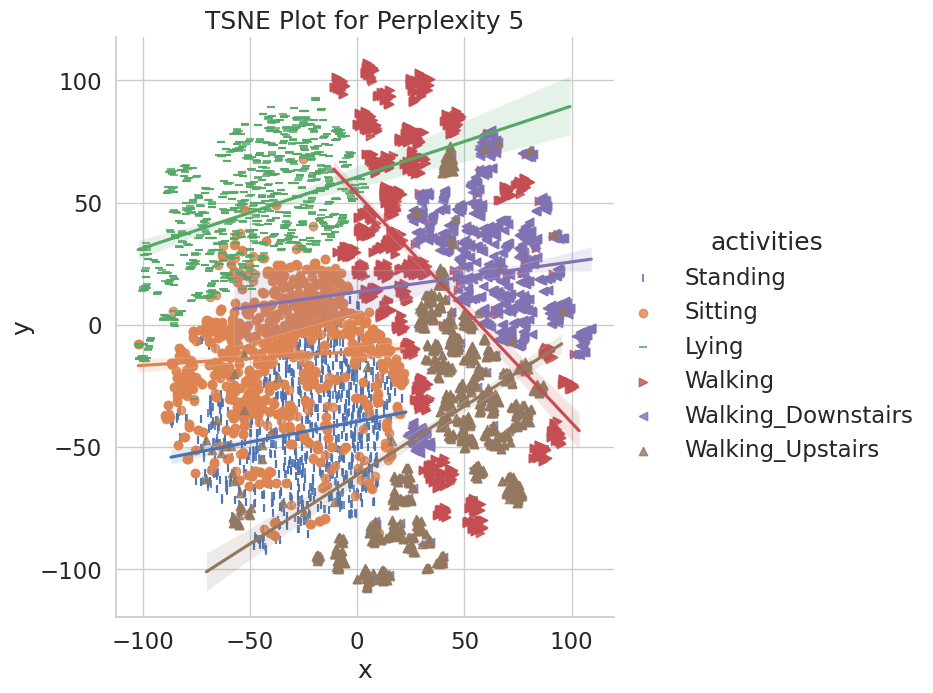

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.024s...
[t-SNE] Computed neighbors for 7351 samples in 2.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.133804
[t-SNE] Computed conditional probabilities in 0.080s
[t-SNE] Iteration 50: error = 97.8875275, gradient norm = 0.0349574 (50 iterations in 7.329s)
[t-SNE] Iteration 100: error = 88.9048309, gradient norm = 0.0109813 (50 iterations in 2.561s)
[t-SNE] Iteration 150: error = 86.7305145, gradient norm = 0

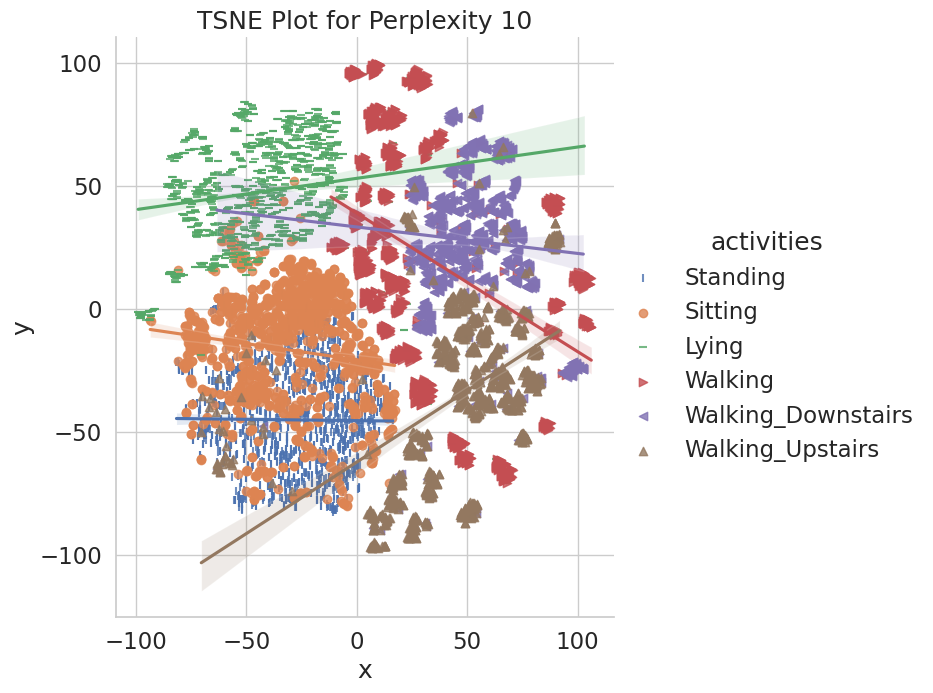

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.030s...
[t-SNE] Computed neighbors for 7351 samples in 3.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.274318
[t-SNE] Computed conditional probabilities in 0.143s
[t-SNE] Iteration 50: error = 89.2894897, gradient norm = 0.0299242 (50 iterations in 5.548s)
[t-SNE] Iteration 100: error = 82.9730530, gradient norm = 0.0080231 (50 iterations in 2.931s)
[t-SNE] Iteration 150: error = 81.5969543, gradient norm = 0

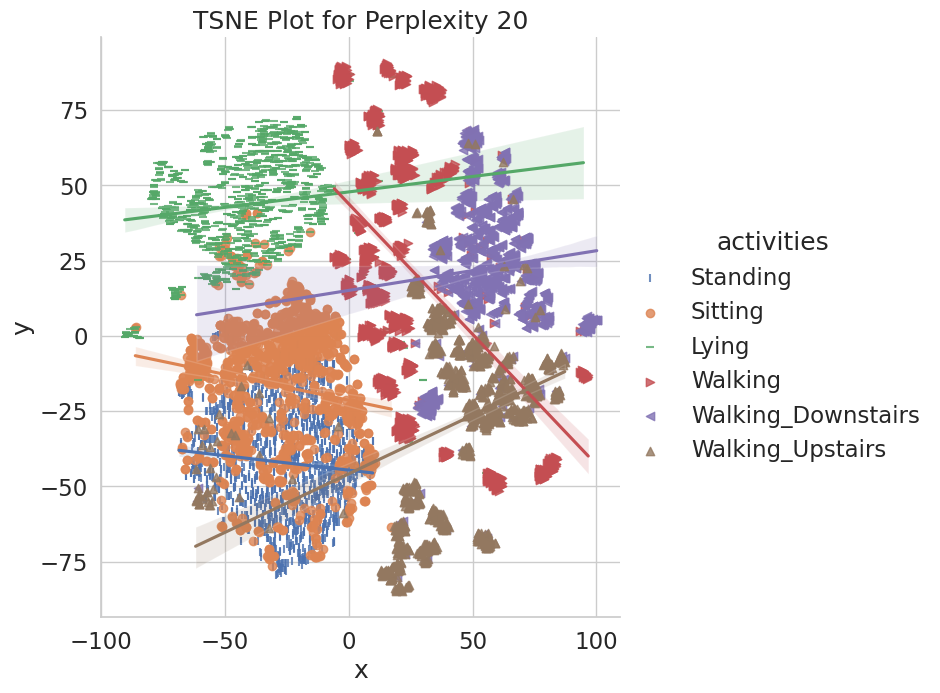

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.023s...
[t-SNE] Computed neighbors for 7351 samples in 2.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.399078
[t-SNE] Computed conditional probabilities in 0.293s
[t-SNE] Iteration 50: error = 81.3558960, gradient norm = 0.0264985 (50 iterations in 9.887s)
[t-SNE] Iteration 100: error = 77.2814026, gradient norm = 0.0056894 (50 iterations in 3.770s)
[t-SNE] Iteration 150: error = 76.3660126, gradient norm = 

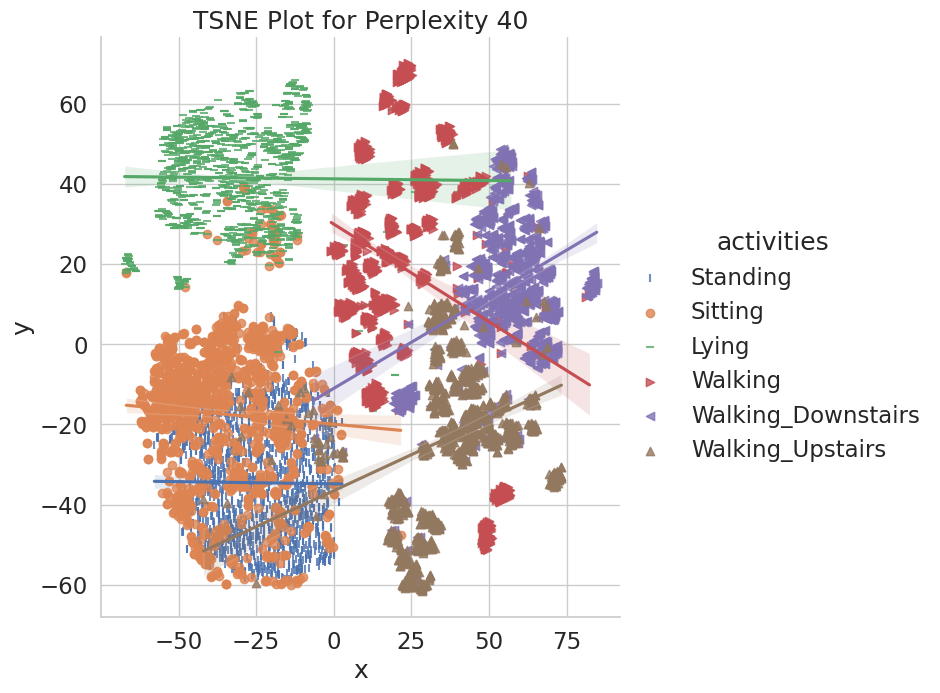

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.024s...
[t-SNE] Computed neighbors for 7351 samples in 2.814s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.559274
[t-SNE] Computed conditional probabilities in 0.737s
[t-SNE] Iteration 50: error = 70.9454651, gradient norm = 0.0238892 (50 iterations in 11.395s)
[t-SNE] Iteration 100: error = 68.3441162, gradient norm = 0.0047146 (50 iterations in 5.156s)
[t-SNE] Iteration 150: error = 67.9557800, gradient norm =

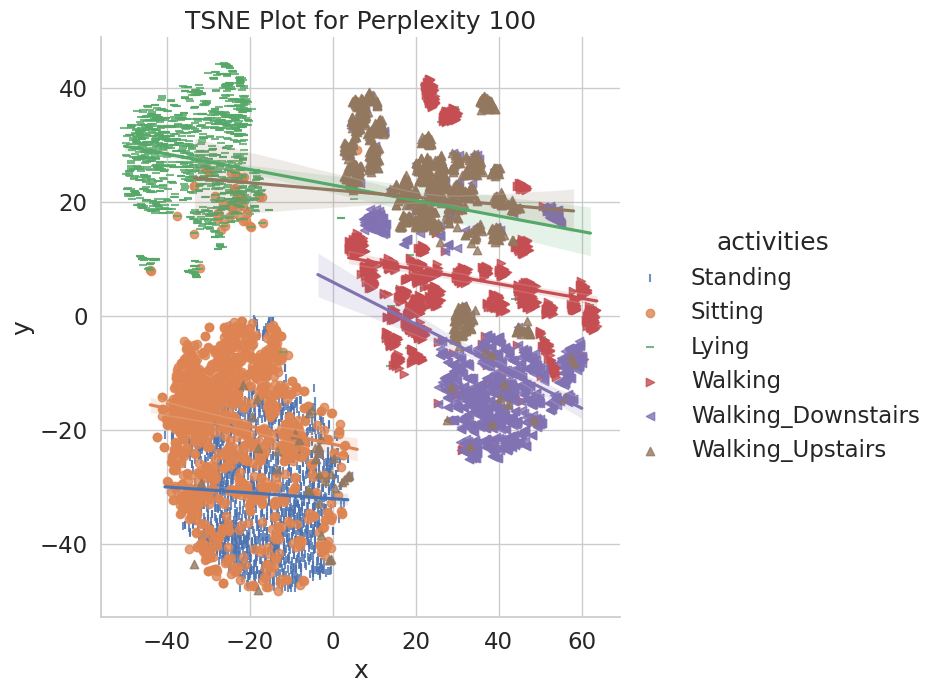

In [198]:
perplexities = [5, 10, 20, 40, 100]
for perplexity in perplexities:
    plt_tsne(perplexity, train_df)

In [ ]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

x_test = test_df.drop( ["subject_id", "activity", "activity_name"], axis = 1)
y_test = test_df["activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7351, 561), (7351,), (2946, 561), (2946,))

In [ ]:
table = pd.DataFrame (columns = ["Model", "Accuracy (%)"])
def keeping_record(model_name, accuracy): 
    global table
    table = table.append(pd.DataFrame ([[model_name, accuracy]], columns = ["Model", "Accuracy (%)"])) 
    table.reset_index (drop = True, inplace = True)

In [ ]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    sns.set(font_scale=1.5)

    # confusionMatx = [[1, 2],
    #                  [3, 4]] 
    # confusionMatx. T = [[1, 3],
    #                     [2, 4]]
    # confusionMatx.sum(axis = 1) axis-0 corresponds to columns and axis-1 corresponds to rows # confusionMatx.sum(axix -1) = [[3, 7]]
    # (confusionMatx. T)/(confusionMatx. sum(axis-1)) = [[1/3, 3/7]
    #                                                    [2/3, 4/7]]
    # (confusionMatx.T)/(confusionMatx. sum(axis-1)).T = [[1/3, 2/3], 
    #                                                      [3/7, 4/7]]
    # sum of row elements = 1

    labels = ["WALKING","WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING","LYING"]

    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap="Blues", annot = True, fmt=".1f", xticklabels=labels, yticklabels=labels) 
    plt.title("Confusion Matrix", fontsize = 30) 
    plt.xlabel ('Predicted Class', fontsize=20)
    plt.ylabel('Original Class', fontsize =20)
    plt.tick_params(labelsize = 15) 
    plt.xticks(rotation = 90)

    plt.show()
     
    print("_"*125)

    plt.figure(figsize=(16,7))

    sns.heatmap(confusionMatx, cmap="Blues", annot = True, fmt=".2f", xticklabels=labels, yticklabels=labels) 
    plt.title("Precission Matrix", fontsize = 30) 
    plt.xlabel ('Predicted Class', fontsize=20)
    plt.ylabel('Original Class', fontsize =20)
    plt.tick_params(labelsize = 15) 
    plt.xticks(rotation = 90)

    plt.show()
     
    print("_"*125)

    plt.figure(figsize=(16,7))

    sns.heatmap(confusionMatx, cmap="Blues", annot = True, fmt=".2f", xticklabels=labels, yticklabels=labels) 
    plt.title("Recall Matrix", fontsize = 30) 
    plt.xlabel ('Predicted Class', fontsize=20)
    plt.ylabel('Original Class', fontsize =20)
    plt.tick_params(labelsize = 15) 
    plt.xticks(rotation = 90)

    plt.show()


In [ ]:
def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):

    start = datetime.now() 
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)

    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now()-start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)

    print('----------------')
    print('|   Accuracy   |')
    print('----------------')
    print(str(accuracy)+"%\n")

    print('----------------------')
    print("|   Best Estimator   |")
    print('----------------------')

    print("{}\n".format(cross_val.best_estimator_))

    print('-----------------------------')
    print('|   Best Hyper-Parameters   |')
    print('-----------------------------')

    print(cross_val.best_params_)

    keeping_record(model_name, accuracy)
    print("\n\n")
    print_confusionMatrix(y_test, predicted_points)

# **Linear** **SVM**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:02:42.142632

----------------
|   Accuracy   |
----------------
92.29%

----------------------
|   Best Estimator   |
----------------------
LinearSVC(C=0.1)

-----------------------------
|   Best Hyper-Parameters   |
-----------------------------
{'C': 0.1}





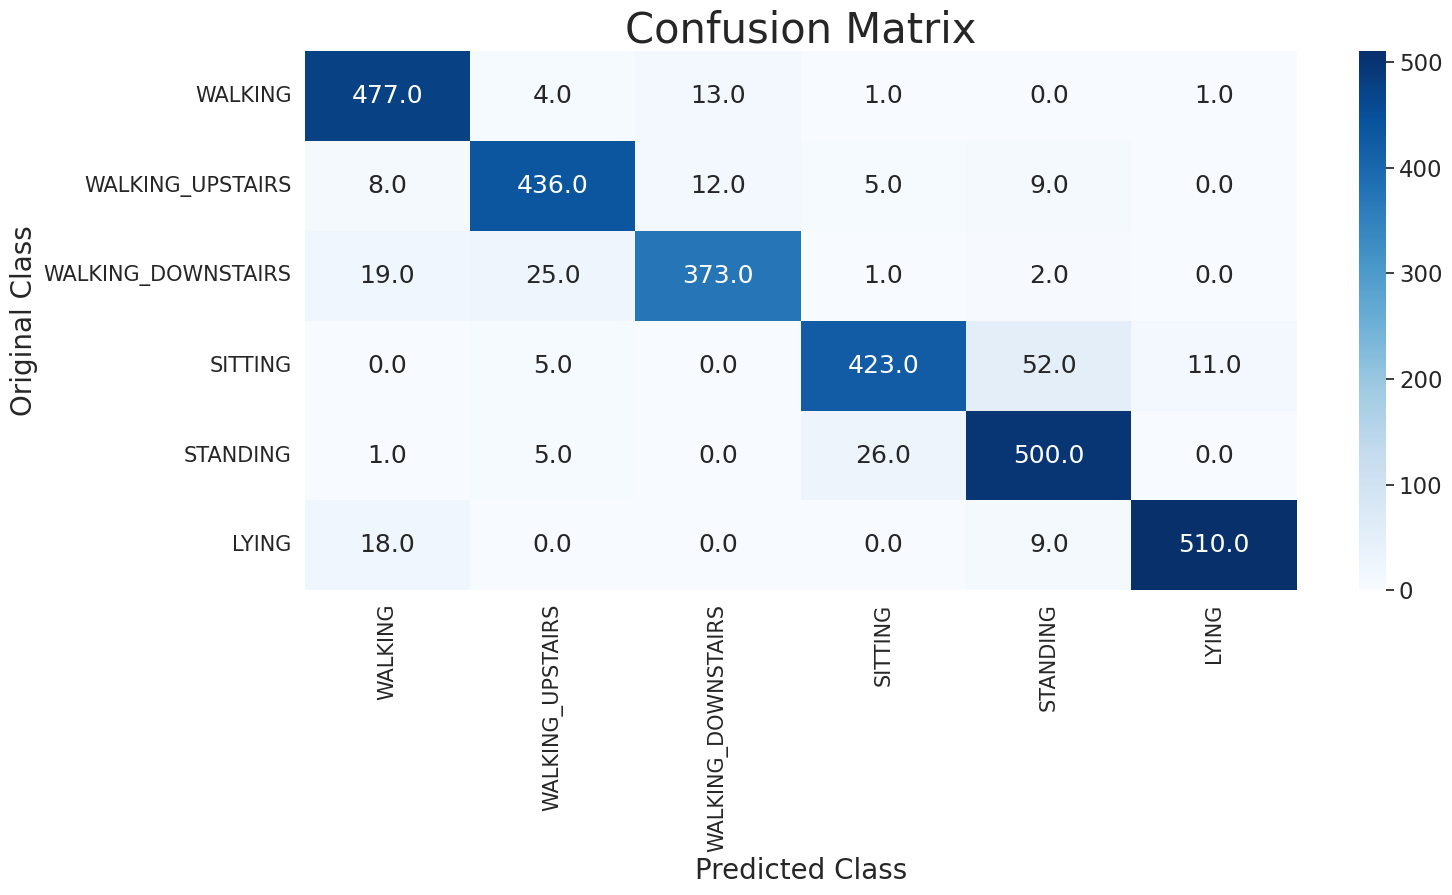

_____________________________________________________________________________________________________________________________


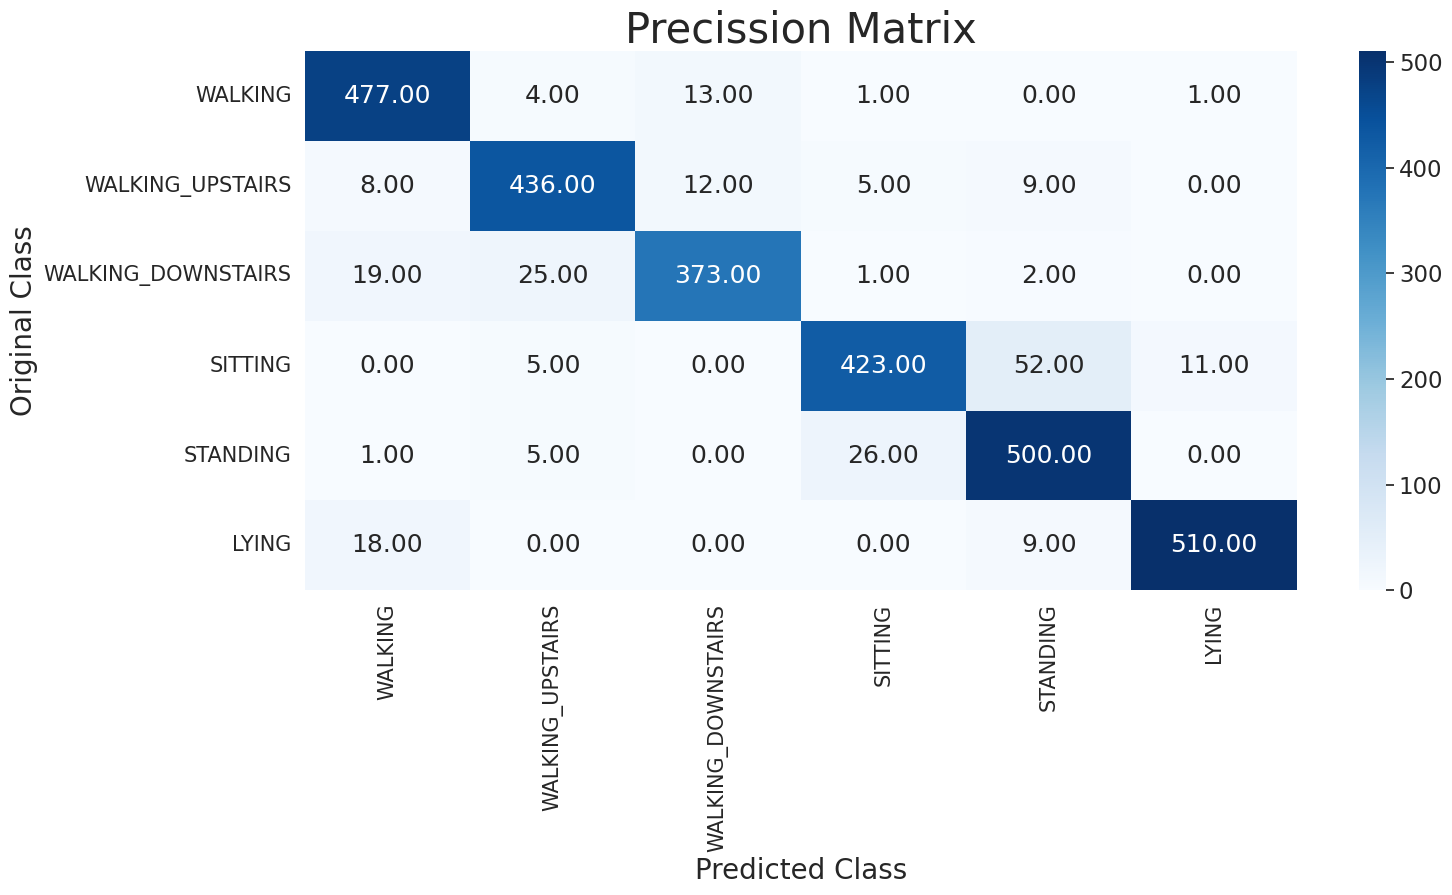

_____________________________________________________________________________________________________________________________


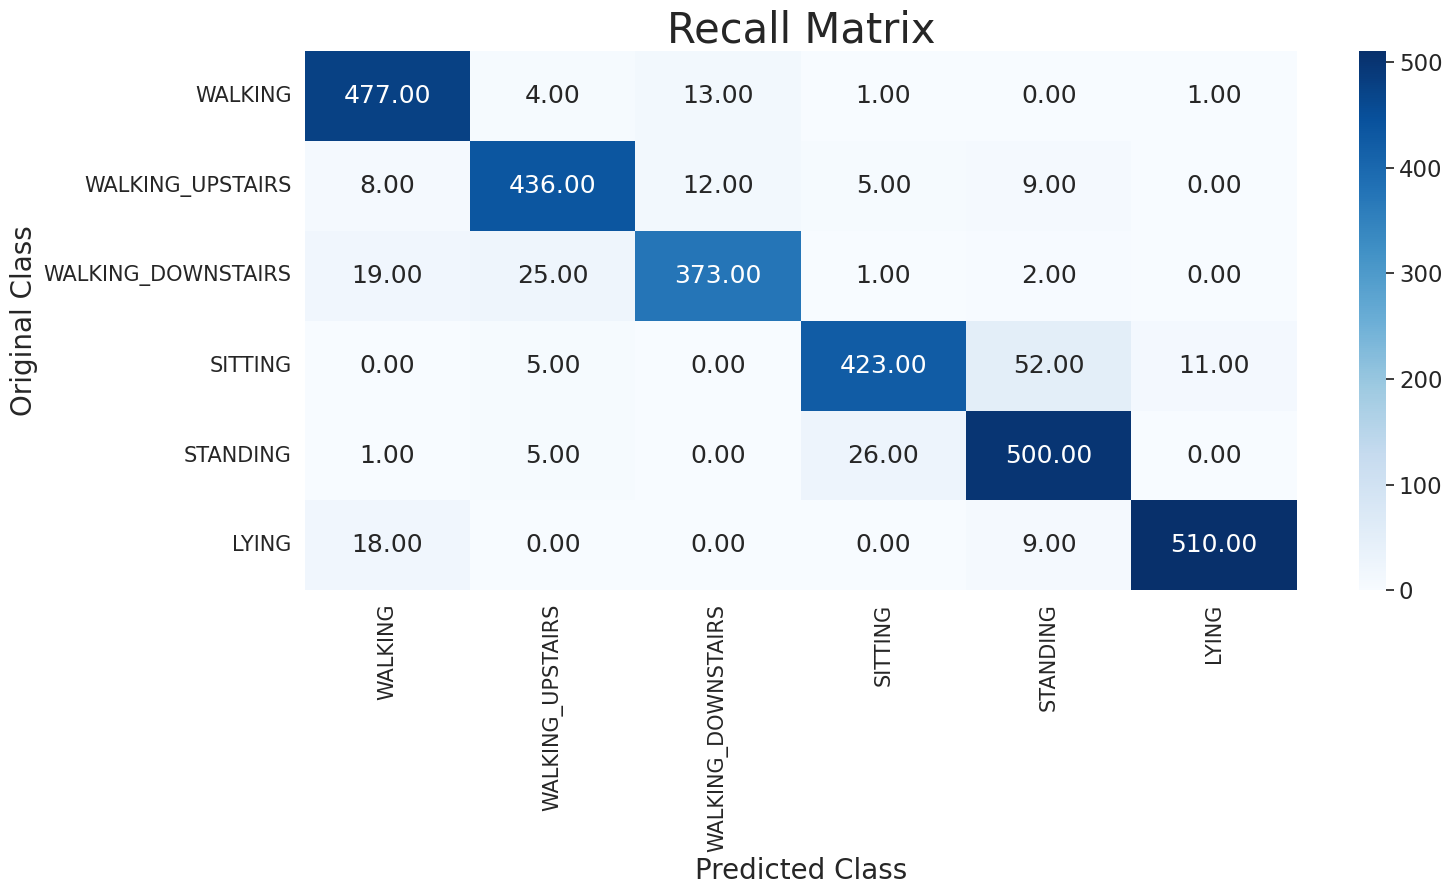

In [ ]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = LinearSVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Linear SVM")

# **RBF SVM**

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:01:56.247360

----------------
|   Accuracy   |
----------------
92.6%

----------------------
|   Best Estimator   |
----------------------
SVC(C=10)

-----------------------------
|   Best Hyper-Parameters   |
-----------------------------
{'C': 10}





<ipython-input-118-680912b22815>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(pd.DataFrame ([[model_name, accuracy]], columns = ["Model", "Accuracy (%)"]))


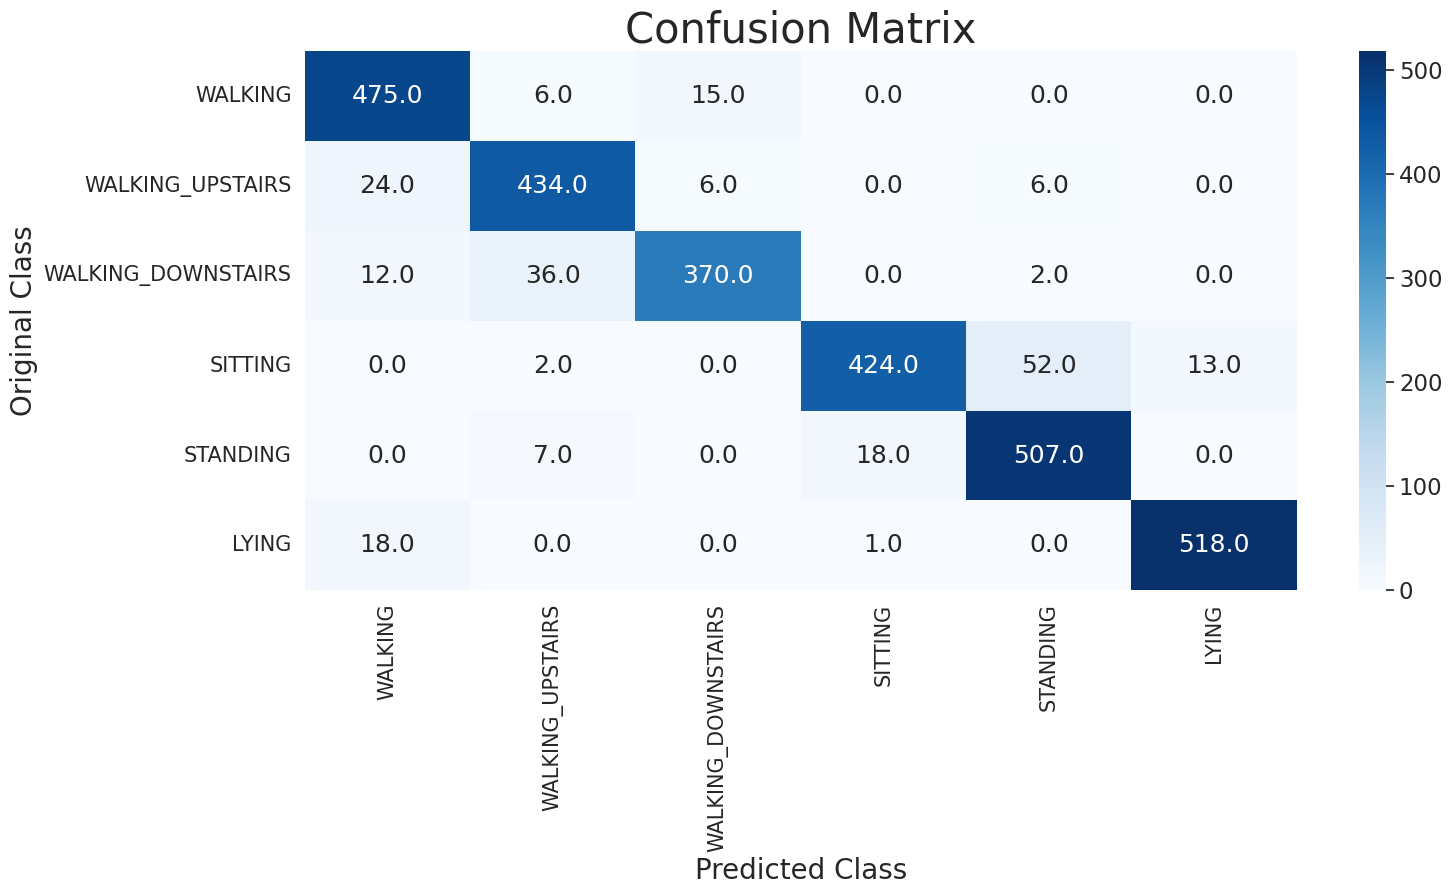

_____________________________________________________________________________________________________________________________


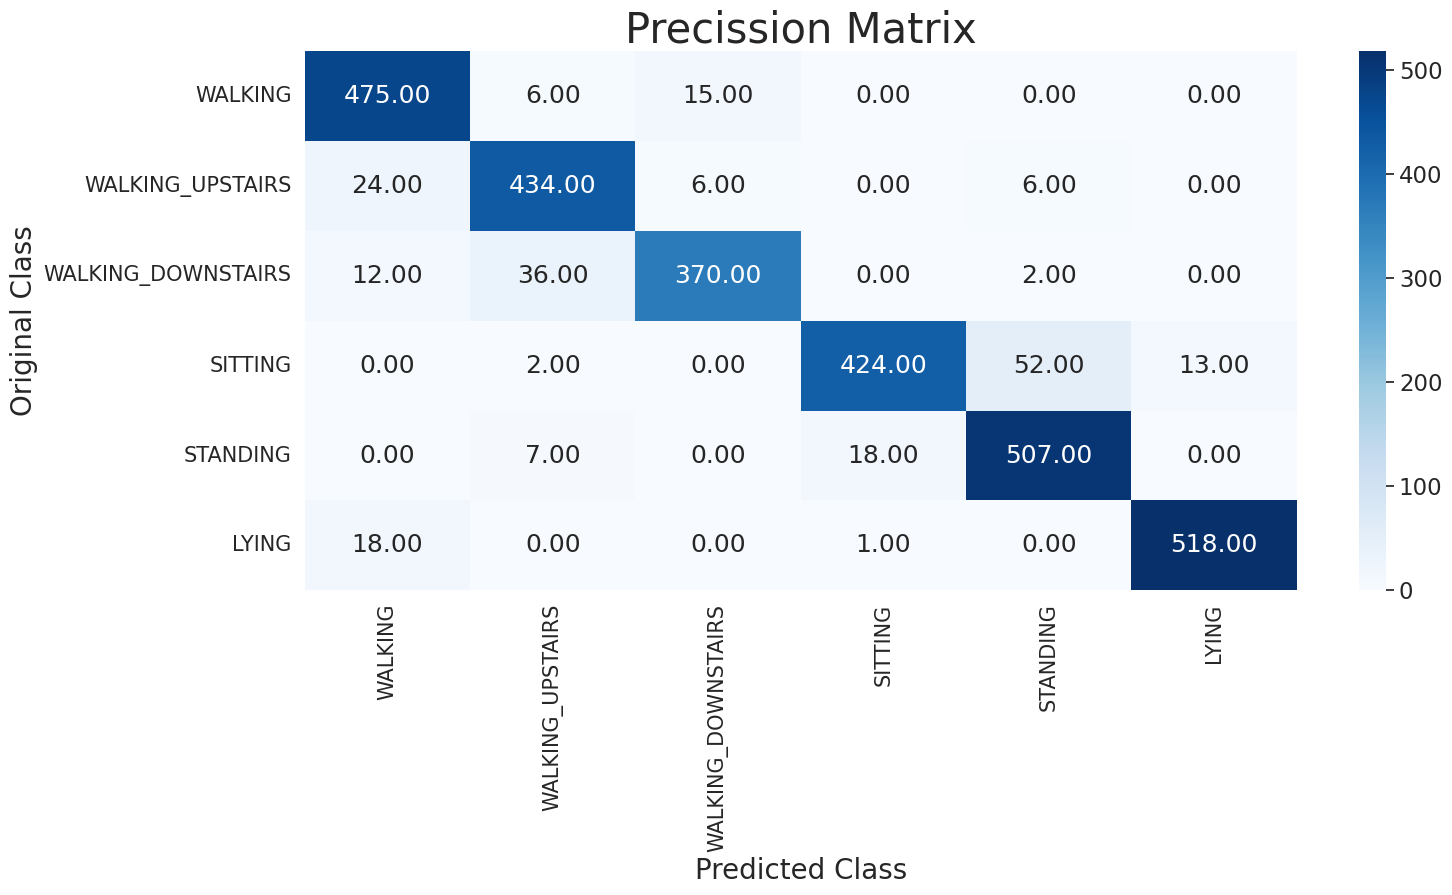

_____________________________________________________________________________________________________________________________


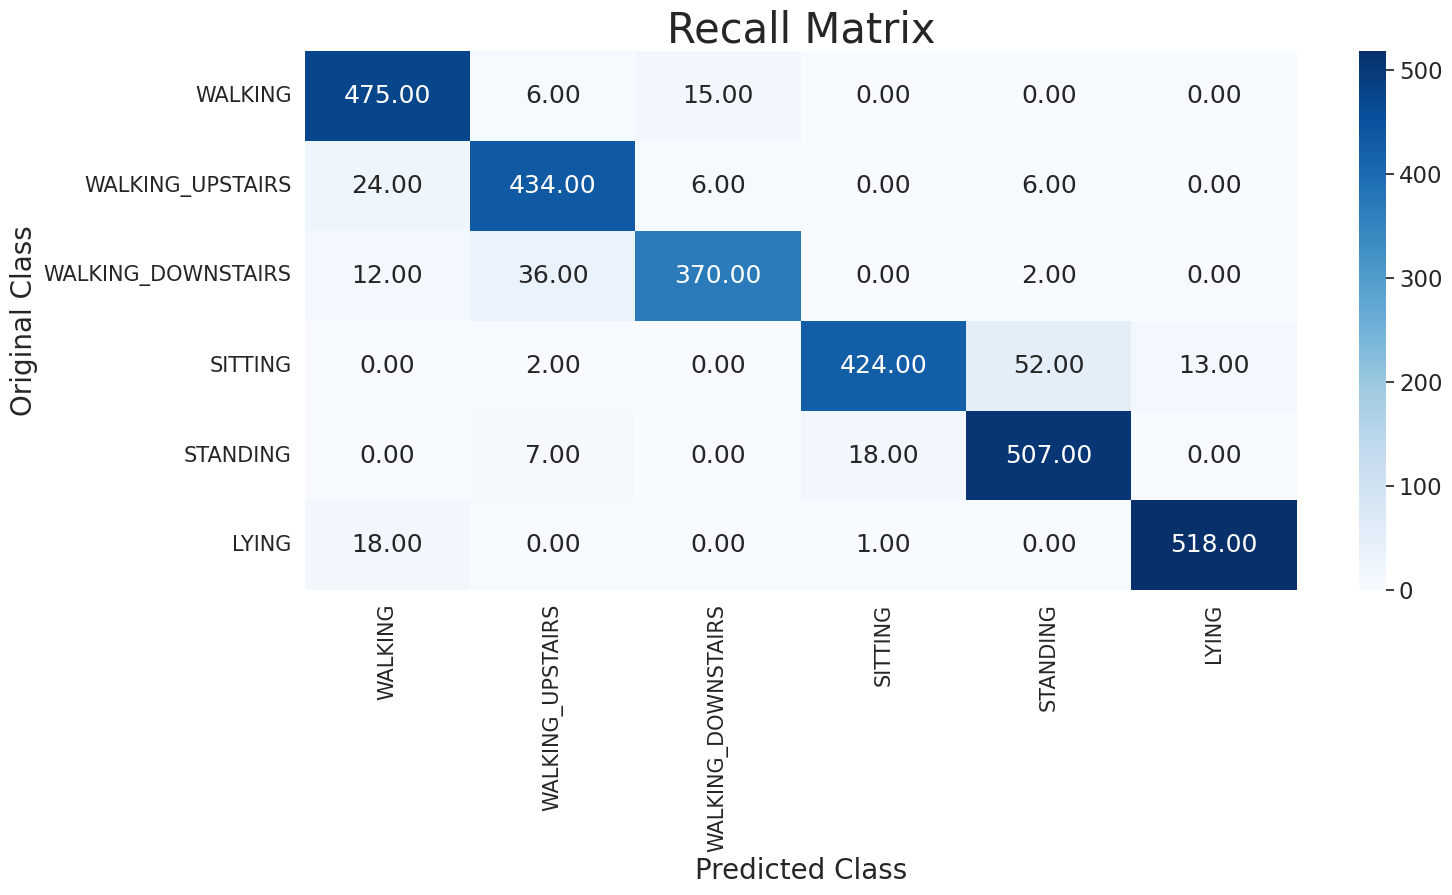

In [ ]:
parameters = {"C": [8.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]} 
clf = SVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "RBF SVM")

# **Decision Trees**

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:40.218647

----------------
|   Accuracy   |
----------------
84.22%

----------------------
|   Best Estimator   |
----------------------
DecisionTreeClassifier(max_depth=7)

-----------------------------
|   Best Hyper-Parameters   |
-----------------------------
{'max_depth': 7}





<ipython-input-118-680912b22815>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(pd.DataFrame ([[model_name, accuracy]], columns = ["Model", "Accuracy (%)"]))


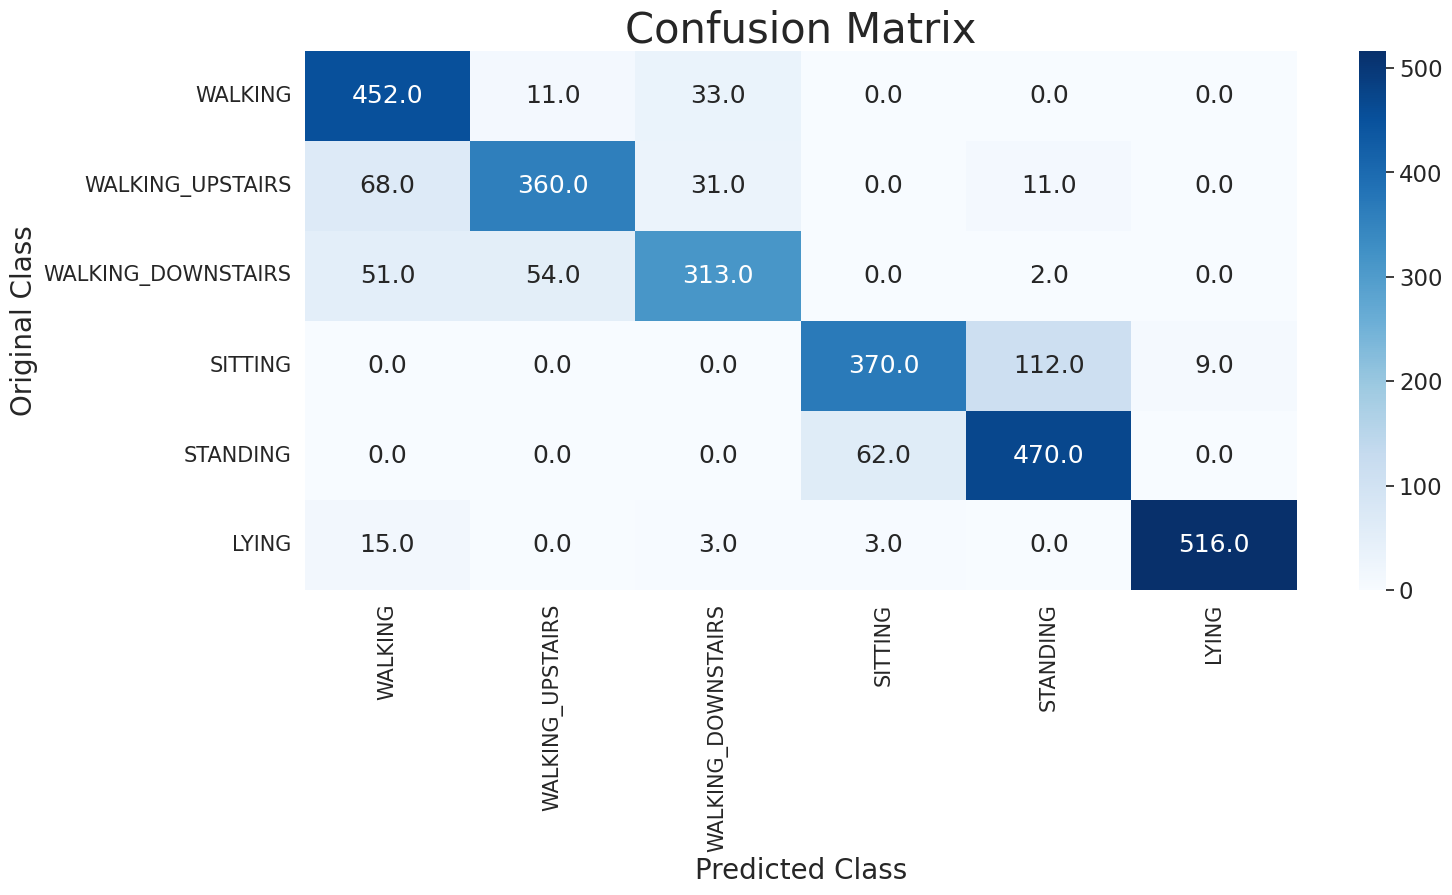

_____________________________________________________________________________________________________________________________


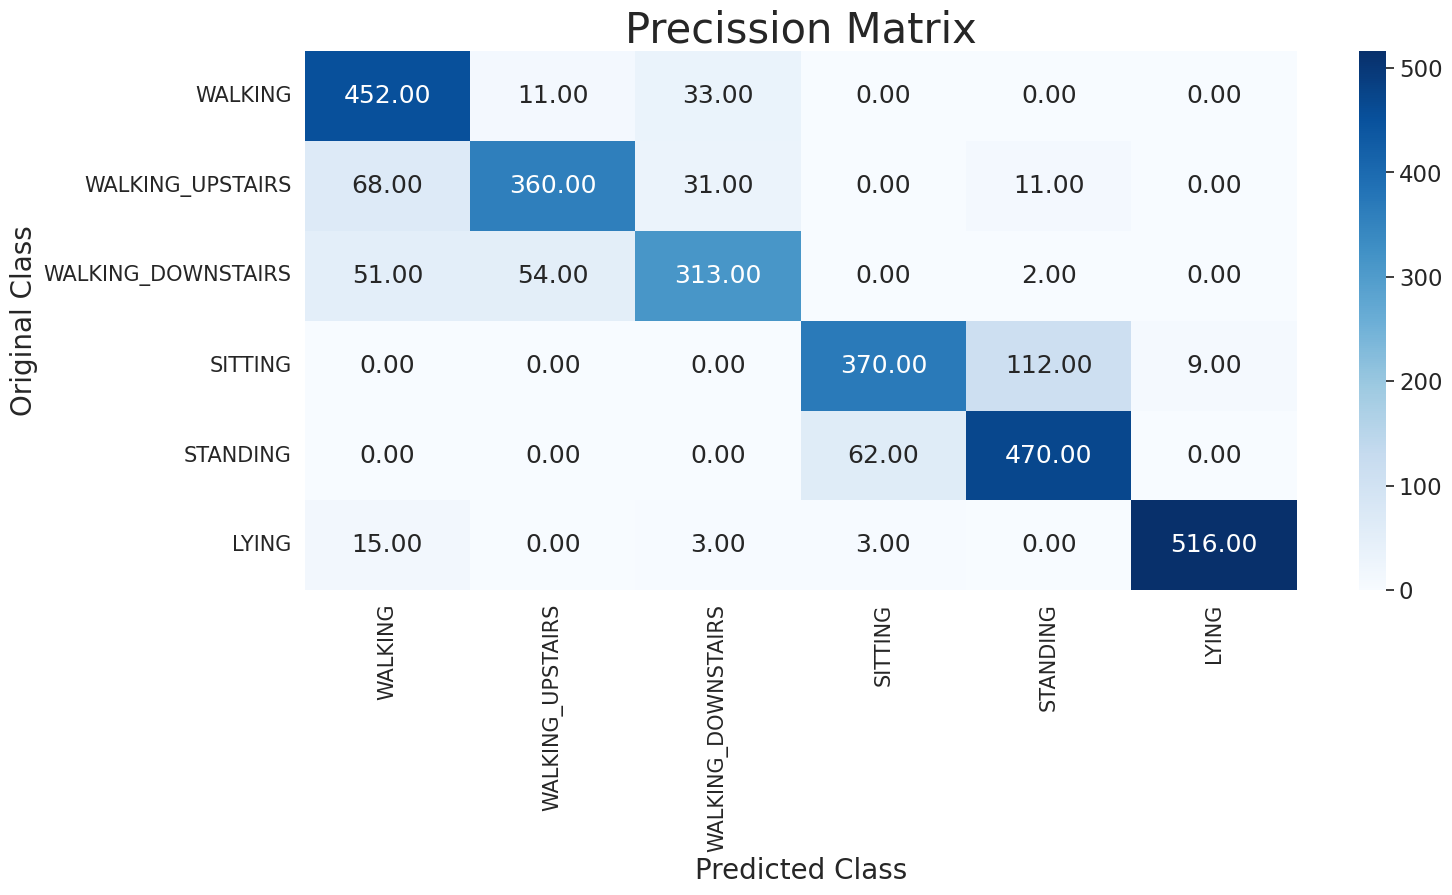

_____________________________________________________________________________________________________________________________


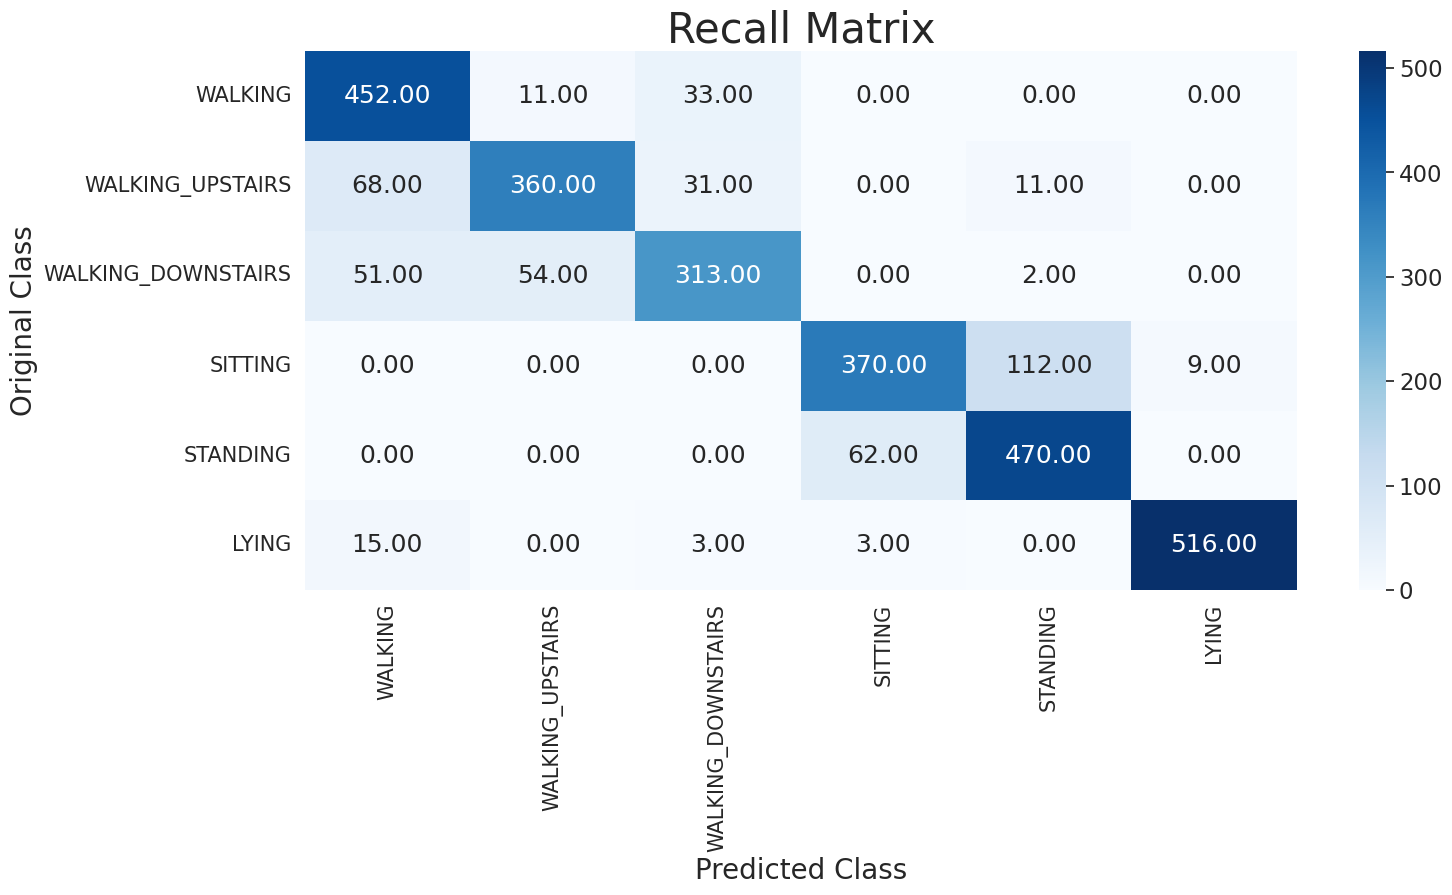

In [152]:
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
clf = DecisionTreeClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Decision Trees")

# **Random Forest**

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:08:46.098950

----------------
|   Accuracy   |
----------------
90.02%

----------------------
|   Best Estimator   |
----------------------
RandomForestClassifier(n_estimators=200)

-----------------------------
|   Best Hyper-Parameters   |
-----------------------------
{'n_estimators': 200}





<ipython-input-118-680912b22815>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(pd.DataFrame ([[model_name, accuracy]], columns = ["Model", "Accuracy (%)"]))


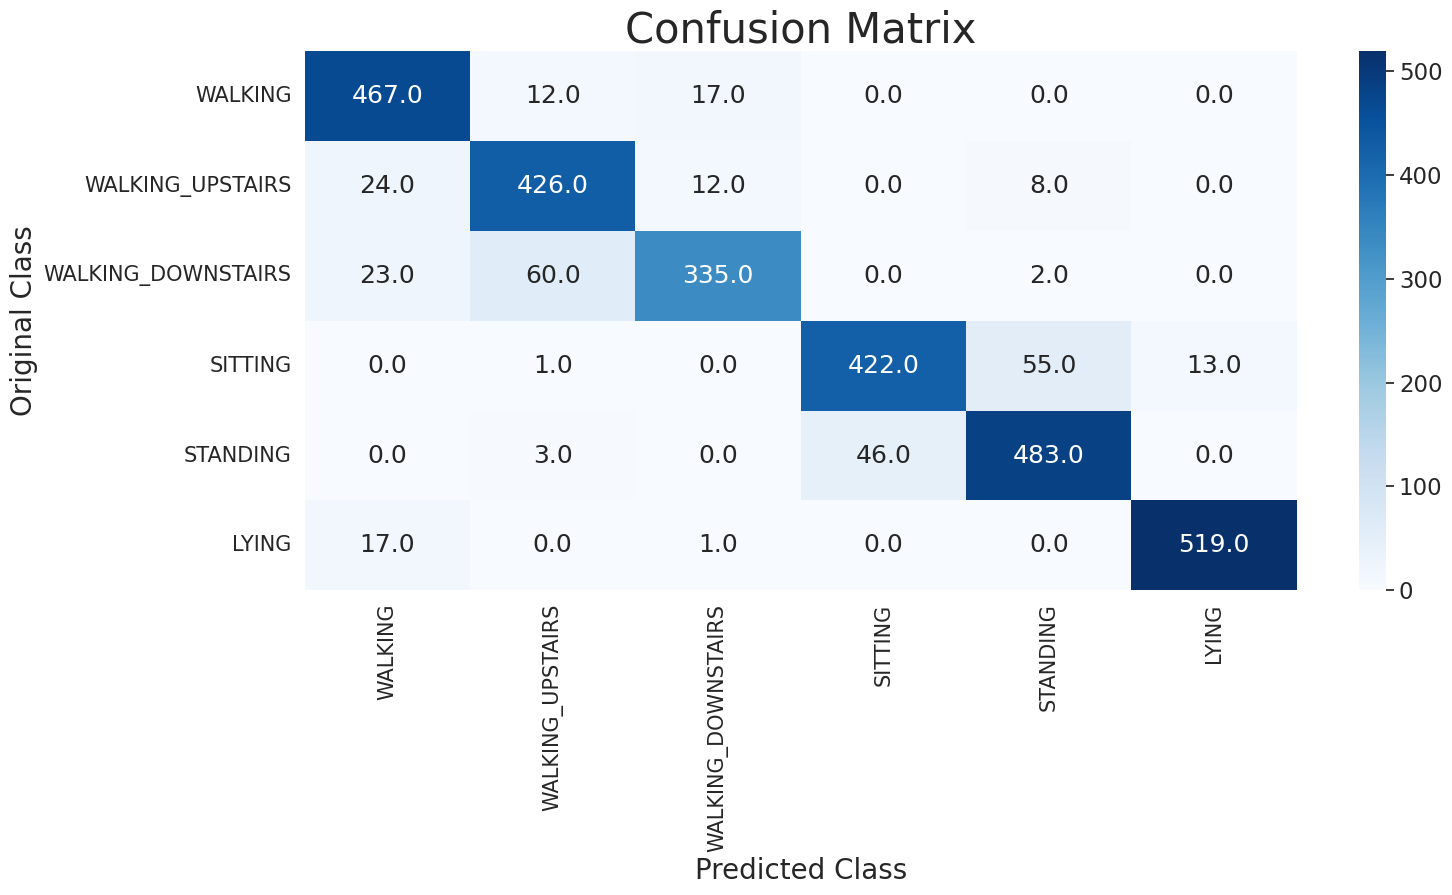

_____________________________________________________________________________________________________________________________


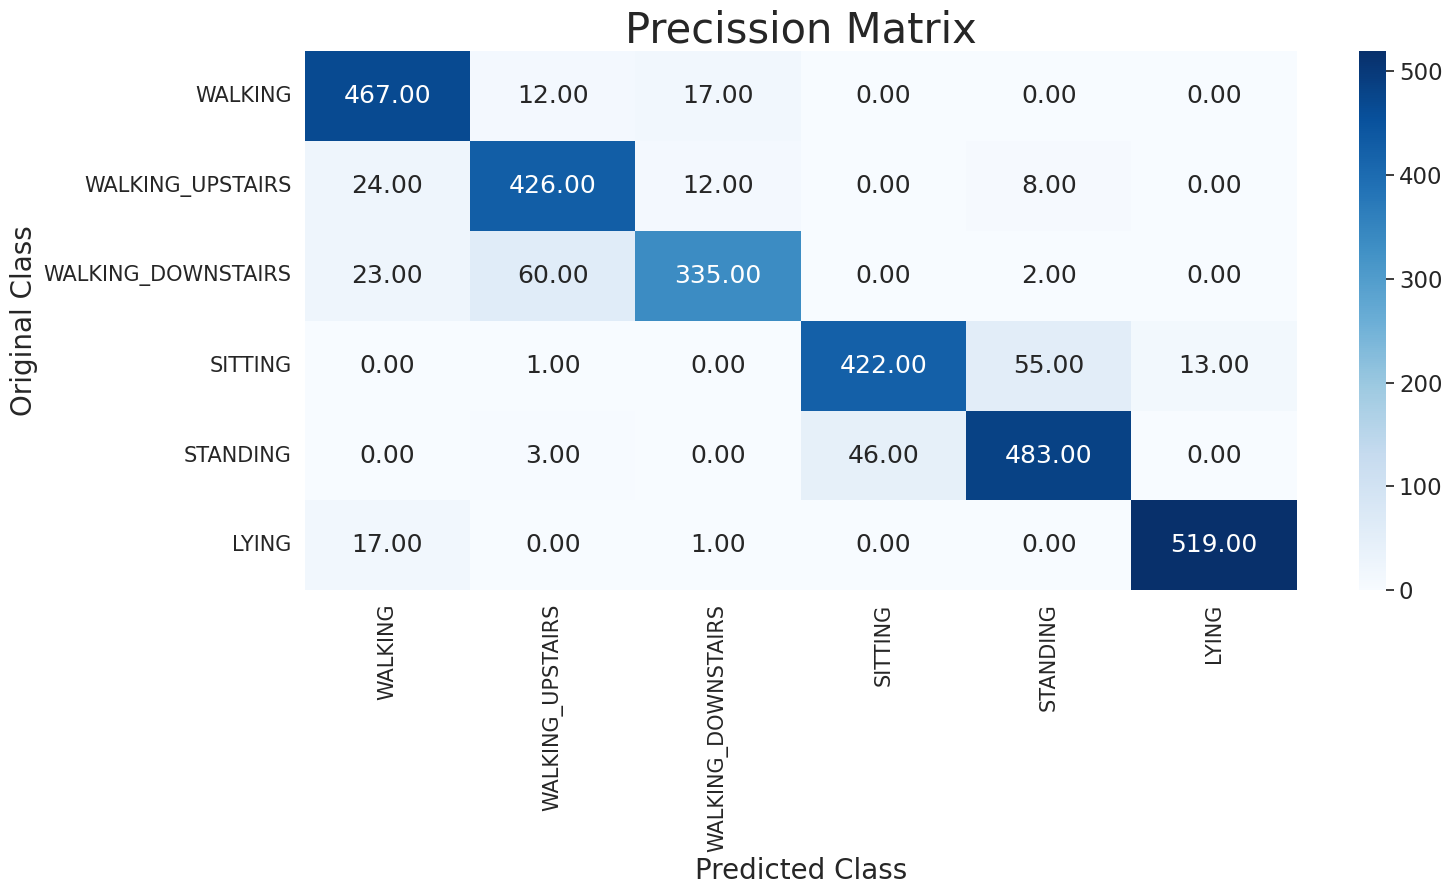

_____________________________________________________________________________________________________________________________


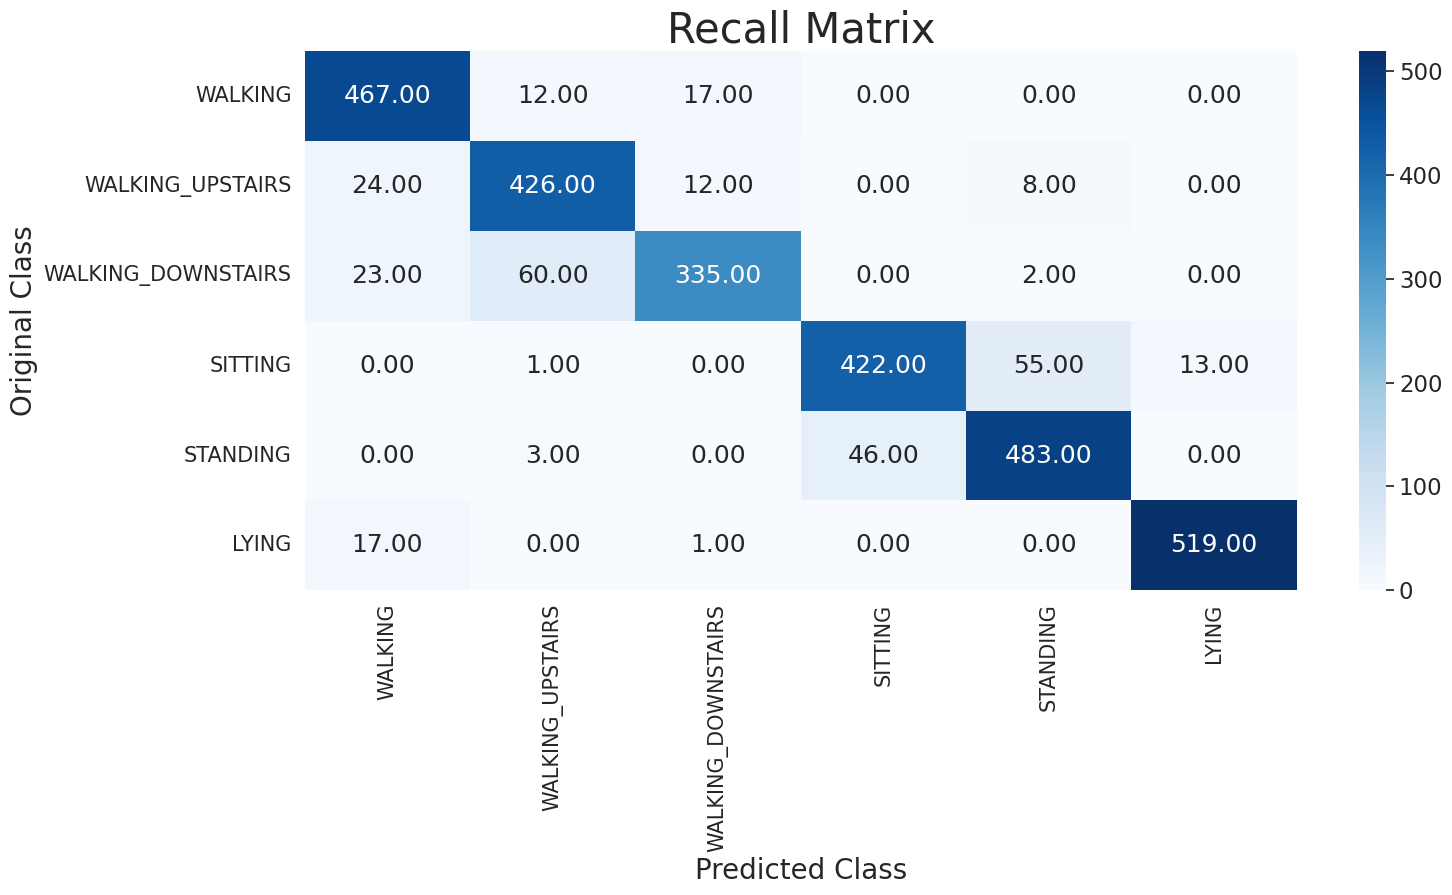

In [145]:
parameters = {"n_estimators": [50, 100, 200, 400, 800]}
clf = RandomForestClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Random Forest")

# **Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:43.037531

----------------
|   Accuracy   |
----------------
91.68%

----------------------
|   Best Estimator   |
----------------------
LogisticRegression(C=0.1, multi_class='ovr')

-----------------------------
|   Best Hyper-Parameters   |
-----------------------------
{'C': 0.1, 'penalty': 'l2'}





<ipython-input-118-680912b22815>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(pd.DataFrame ([[model_name, accuracy]], columns = ["Model", "Accuracy (%)"]))


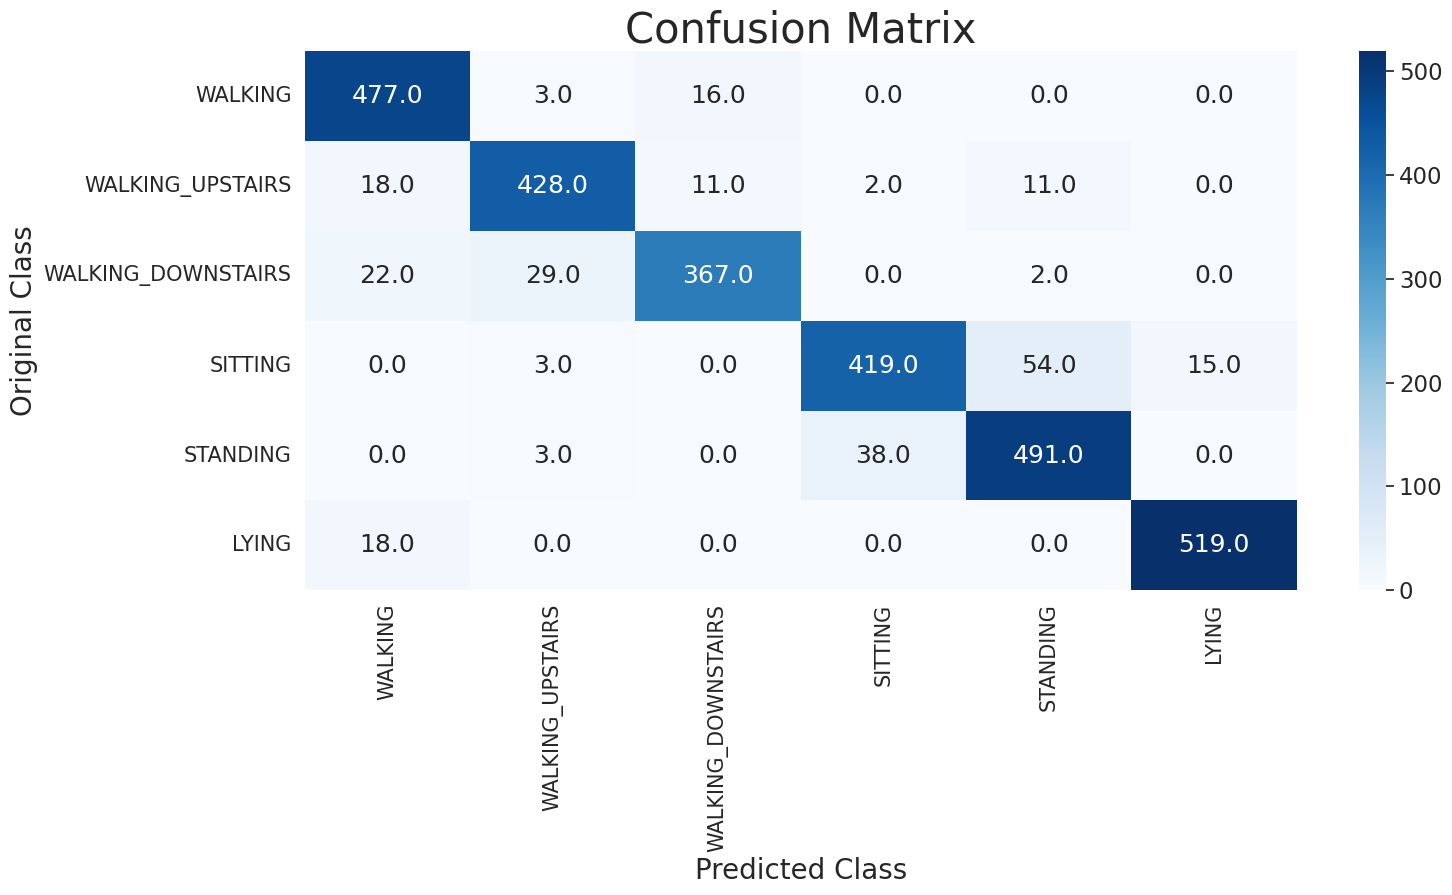

_____________________________________________________________________________________________________________________________


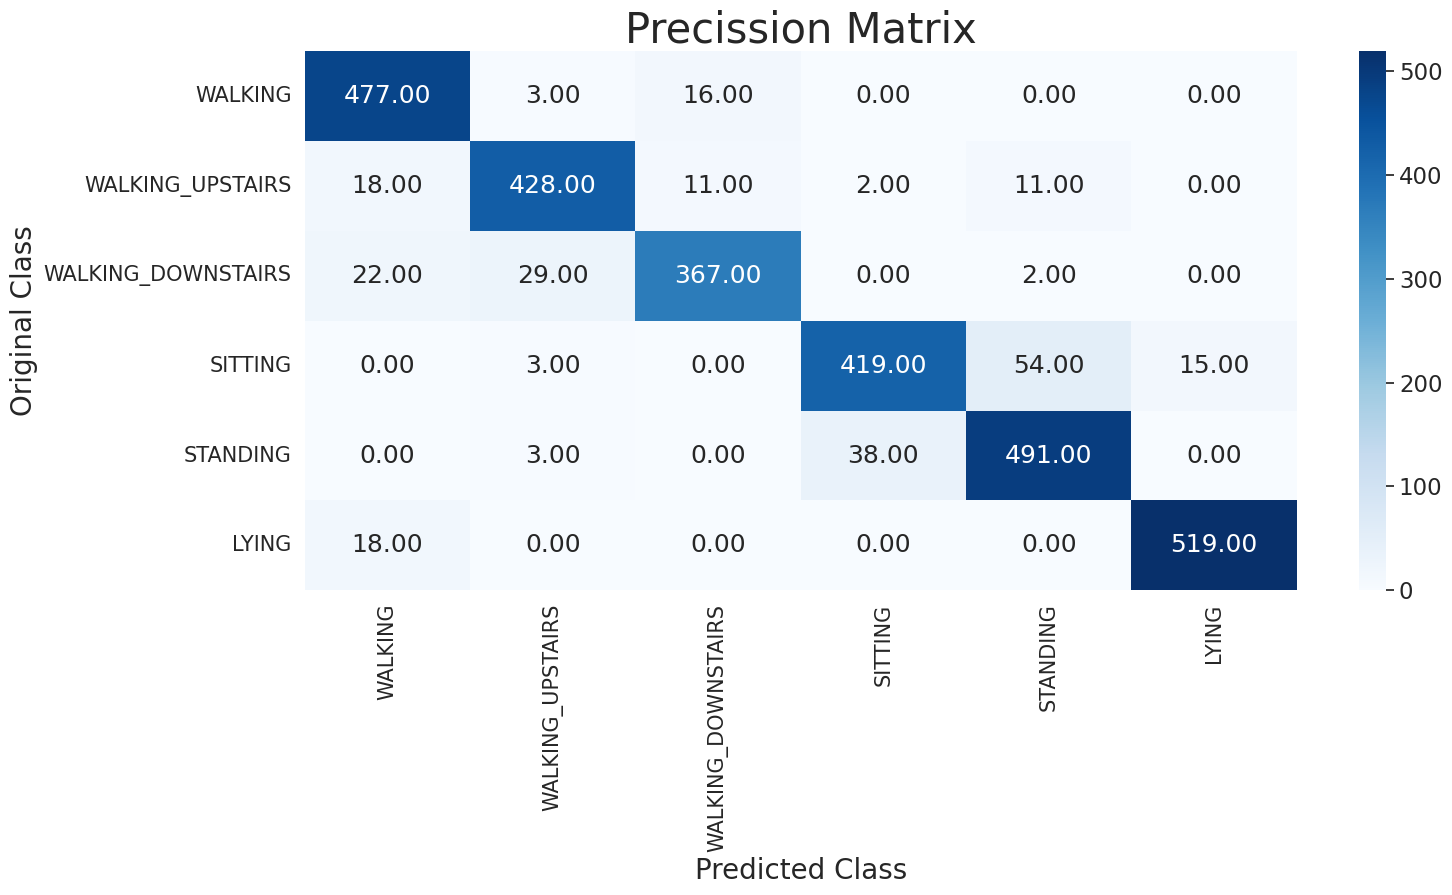

_____________________________________________________________________________________________________________________________


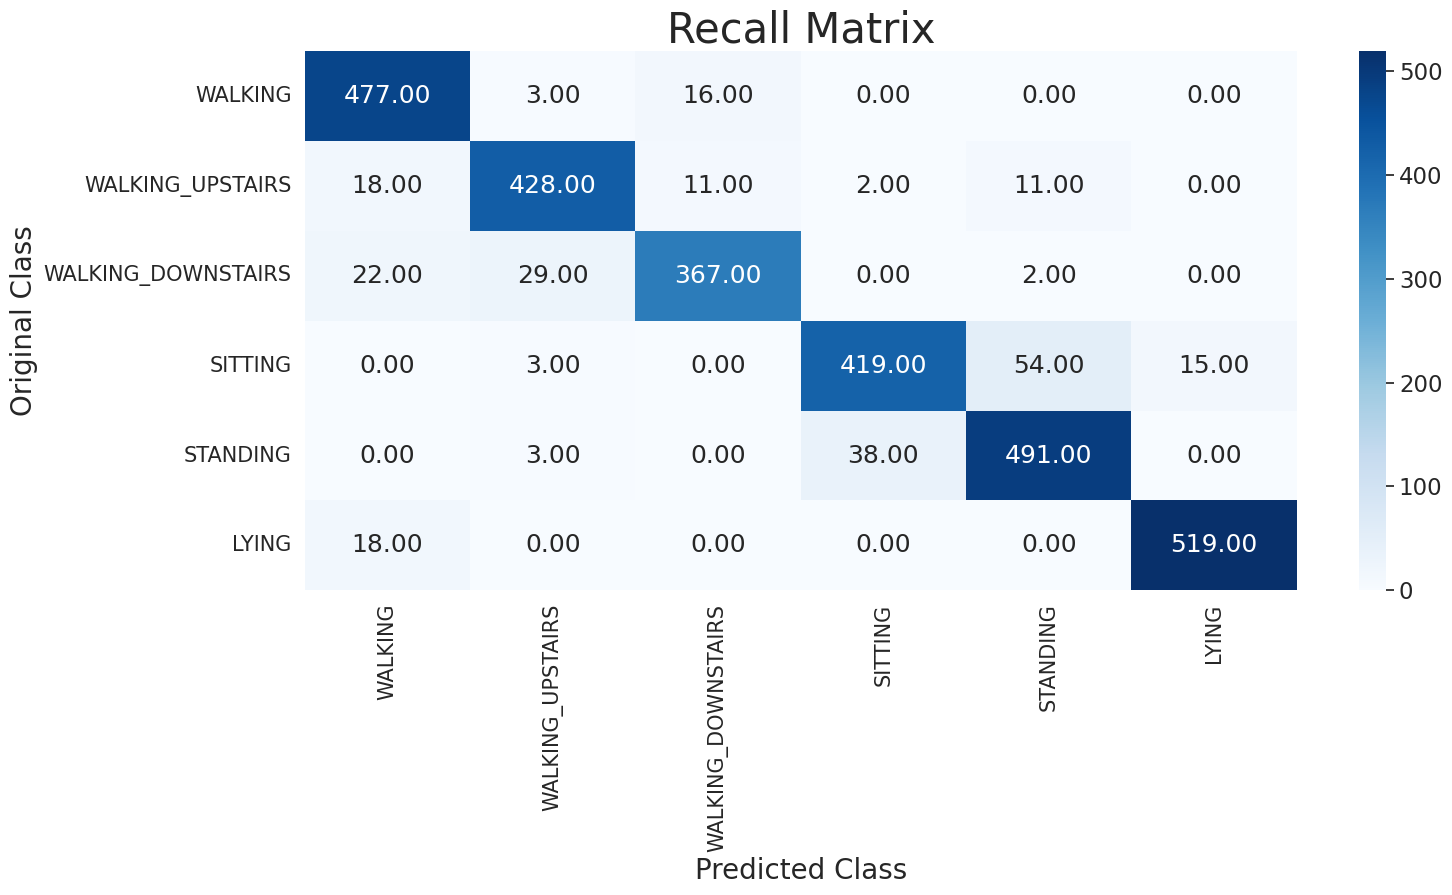

In [144]:
parameters = {"C":[0.001, 0.01, 0.1, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]} 
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Logistic Regression")

In [148]:
table

Model  Accuracy (%)
0           Linear SVM         92.29
1              RBF SVM         92.60
2       Decision Trees         83.84
3       Decision Trees         83.81
4  Logistic Regression         91.68
5        Random Forest         90.02